## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the dataset

In [2]:
df = pd.read_csv("./dermatology/dermatology.data", header=None)
columns_name = [
    "erythema", "scaling", "definite_borders", "itching", "koebner_phenomenon", "polygonal_papules", 
    "follicular_papules", "oral_mucosal_involvement", "knee_and_elbow_involvement", "scalp_involvement", 
    "family_history", "melanin_incontinence", "eosinophils_infiltrate", "PNL_infiltrate", 
    "fibrosis_of_the_papillary_dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", 
    "clubbing_of_the_rete_ridges", "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis", 
    "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer", 
    "vacuolisation_and_damage_of_basal_layer", "spongiosis", "saw-tooth_appearance_of_retes", "follicular_horn_plug", 
    "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate", "band-like_infiltrate", "Age", "Class"
]
df.columns = columns_name

In [3]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

## Data Cleaning and Preprocessing

Visualizing the null values present in the dataset.

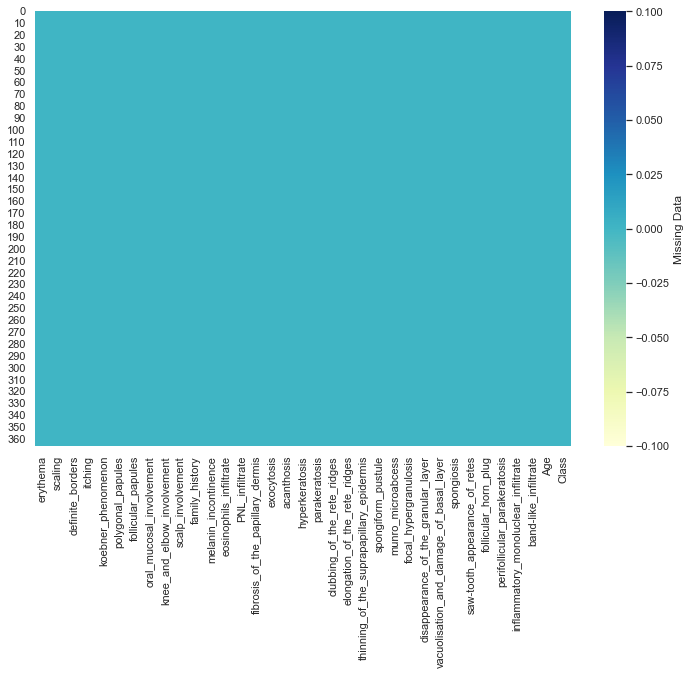

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.show()

In [6]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_infiltrate                      0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

There seems to be no null/missing values. However upon further inspection of the dataset, we can see that there are observation with '?'.

In [7]:
rows_with_question_mark = df[df.apply(lambda row: row.str.contains(r'\?', na=False).any(), axis=1)]
rows_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


<b>Age</b> columns contains multiple <b>?</b> values and should be of integer datatype instead of object.

#### Median imputation for '?' values in the Age column

In [8]:
df['Age'].replace('?', np.nan, inplace=True)
df['Age'] = df['Age'].astype(float)
median_age = df['Age'].median()
median_age = round(median_age)
df['Age'].fillna(median_age, inplace=True)
df['Age'] = df['Age'].astype(int)

In [9]:
df.iloc[33]

erythema                                     2
scaling                                      2
definite_borders                             1
itching                                      0
koebner_phenomenon                           0
polygonal_papules                            0
follicular_papules                           0
oral_mucosal_involvement                     0
knee_and_elbow_involvement                   1
scalp_involvement                            0
family_history                               1
melanin_incontinence                         0
eosinophils_infiltrate                       0
PNL_infiltrate                               2
fibrosis_of_the_papillary_dermis             0
exocytosis                                   0
acanthosis                                   2
hyperkeratosis                               1
parakeratosis                                2
clubbing_of_the_rete_ridges                  2
elongation_of_the_rete_ridges                1
thinning_of_t

## Exploratory Data Analysis

In [10]:
df.shape

(366, 35)

There are 35 features and 366 observations in the dataset.

In [11]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'Class'],
      dtype='object')

#### statistical summary of different columns

In [12]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.267760,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.156875,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


<ul></ul>

#### Histogram to visualize class distribution

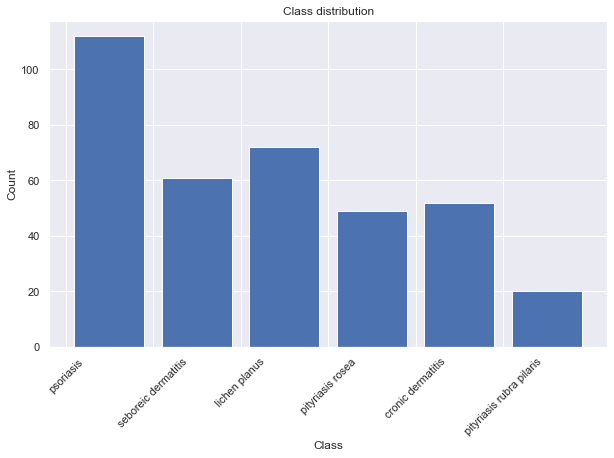

In [35]:
class_names = ["psoriasis", "seboreic dermatitis", "lichen planus", "pityriasis rosea", 
               "cronic dermatitis", "pityriasis rubra pilaris"]

plt.figure(figsize=(10,6))
plt.hist(df['Class'], bins=range(1, 8), rwidth=0.8)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(1,7), class_names, rotation=45)
plt.show()

The <b>Class</b> column is the target variable. It represents six different types of skin diseases labelled from 1 to 6 in the dataframe that patients can be suffering from. Other columns apart from it are the input variables or features.

#### Violin plot to analyse the variation of attributes across different skin disease classes

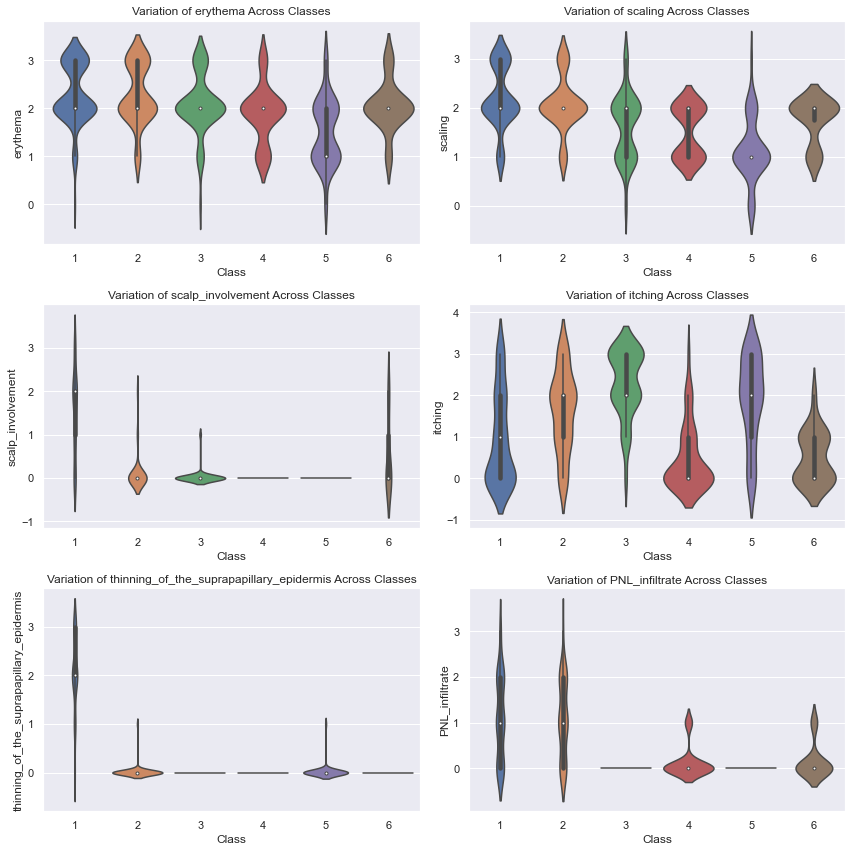

In [36]:
attributes_to_plot = ['erythema', 'scaling', 'scalp_involvement', 'itching', 
                      'thinning_of_the_suprapapillary_epidermis', 'PNL_infiltrate']

# Create a grid of Violin plots for the selected attributes and the target variable
plt.figure(figsize=(12, 12))
for i, attribute in enumerate(attributes_to_plot):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(x='Class', y=attribute, data=df)
    plt.title(f'Variation of {attribute} Across Classes')
    plt.xlabel('Class')
    plt.ylabel(attribute)

plt.tight_layout()
plt.show()

## Correlation analysis
This will help us to identify the features which are strongly correlated and provied insights into relationships between features and skin diseases.

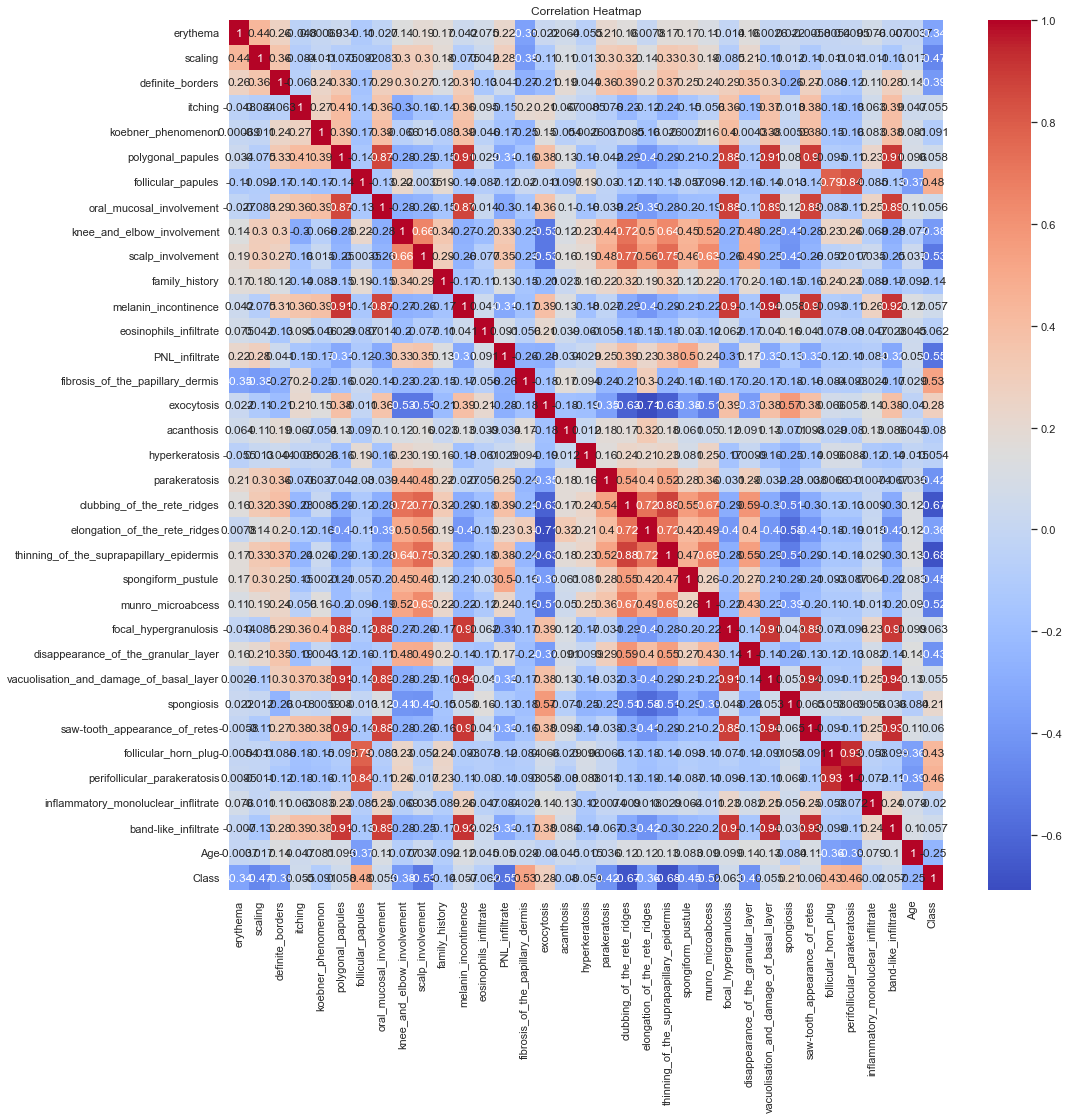

In [15]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap doesnot clearly show the relationship between variables. Let us select 5 of the variables that are the most correlated with the target variable.

In [16]:
corr_target = abs(df.corr()['Class'])
top_corr = corr_target.sort_values(ascending=False).head(6)
top_corr

Class                                       1.000000
thinning_of_the_suprapapillary_epidermis    0.684864
clubbing_of_the_rete_ridges                 0.668781
PNL_infiltrate                              0.550195
scalp_involvement                           0.533208
fibrosis_of_the_papillary_dermis            0.526976
Name: Class, dtype: float64

#### Box plot for top correalted variables by Class

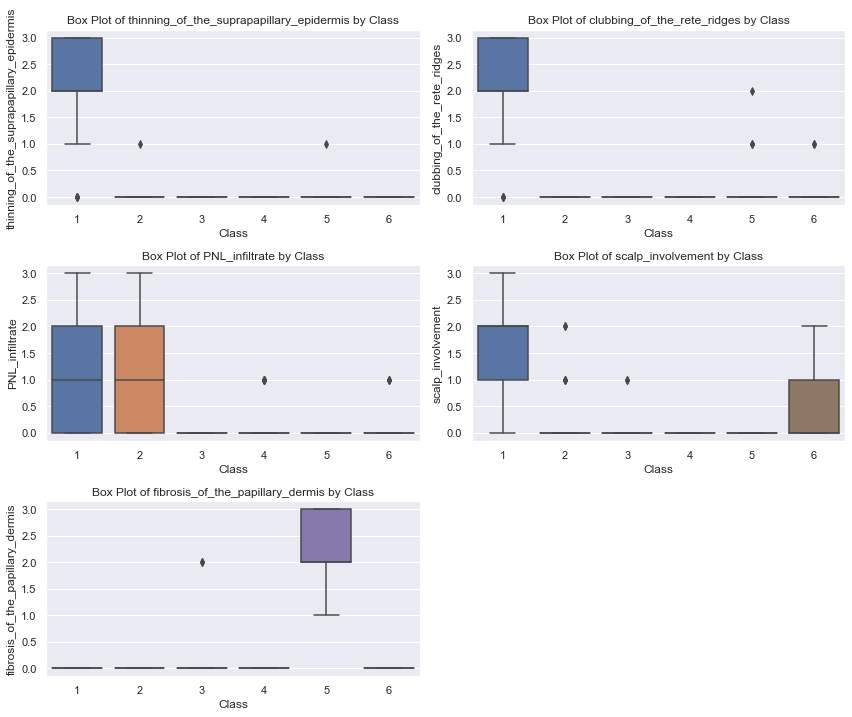

In [17]:
top_correlated_variables = ['thinning_of_the_suprapapillary_epidermis', 'clubbing_of_the_rete_ridges', 
                            'PNL_infiltrate', 'scalp_involvement', 'fibrosis_of_the_papillary_dermis']

plt.figure(figsize=(12, 10))
for i, variable in enumerate(top_correlated_variables):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Class', y=variable, data=df)
    plt.title(f'Box Plot of {variable} by Class')
    plt.xlabel('Class')
    plt.ylabel(variable)

plt.tight_layout()
plt.show()

#### Age distribution

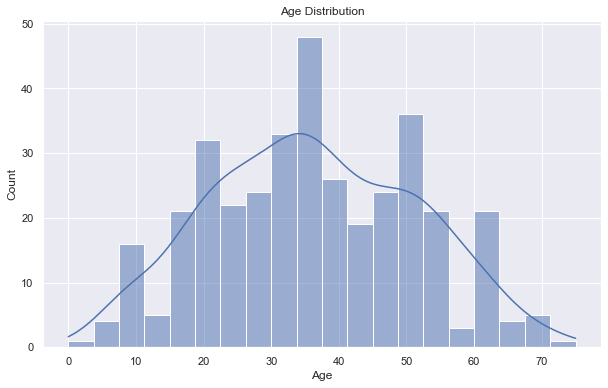

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The age distribution plot with Kernel Density Estimation (KDE) shows that skin disease cases are concentrated in the middle aged group, particularly in the age range of 30 to 50.

#### Family History Analysis

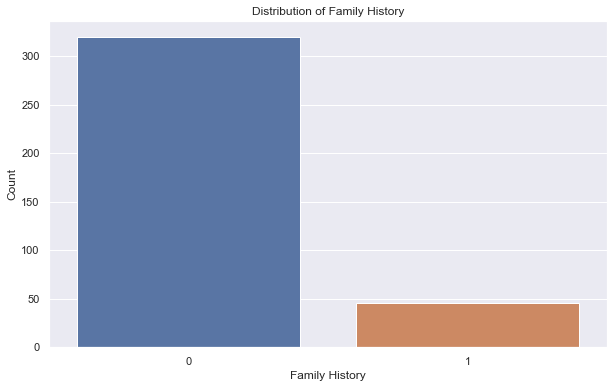

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='family_history', data=df)
plt.title('Distribution of Family History')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

In the dataset, the family history feature has value of either 0 or 1. The value is 1 if any of these diseases has been observed in the family, and the value is 0 if the diseases has not been observed. We can clearly see that the family history does not affect the occurrence of skin disease in most of the cases.

In [20]:
df.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee_and_elbow_involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_infiltrate                      int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


## Data splitting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Naive Bayes Classifier

In [24]:
gaussian_nb = GaussianNB()

In [25]:
gaussian_nb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred_gnb = gaussian_nb.predict(X_test)

In [27]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy (Gaussian Naive Bayes): {accuracy_gnb:.2f}")

Accuracy (Gaussian Naive Bayes): 0.91


In [28]:
print("Classification Report (Gaussian Naive Bayes Classifier):")
print(classification_report(y_test, y_pred_gnb))

Classification Report (Gaussian Naive Bayes Classifier):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.75      0.33      0.46         9
           3       1.00      1.00      1.00        13
           4       0.67      1.00      0.80         8
           5       0.82      0.90      0.86        10
           6       1.00      1.00      1.00         3

    accuracy                           0.91        74
   macro avg       0.87      0.87      0.85        74
weighted avg       0.91      0.91      0.89        74



### Support Vector Classifier

In [29]:
svc = SVC(kernel='linear', C=1.0, random_state=42)

In [30]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [31]:
y_pred_svc = svc.predict(X_test)

In [32]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy (Support Vector Classifier): {accuracy_svc:.2f}")

Accuracy (Support Vector Classifier): 0.96


In [33]:
print("Classification Report (Support Vector Classifier):")
print(classification_report(y_test, y_pred_svc))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        31
           2       0.82      1.00      0.90         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.96        74
   macro avg       0.91      0.92      0.91        74
weighted avg       0.96      0.96      0.96        74

